# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA will find the principal components, it is defined in such a way that the first principal component has the largest possible variance. With the help of PCA we can reduce the dimensions to better visually seperate oure customer. With PCA I hope to find some semgention of oure customers which we can seperate by the kind of products the are buying. And based on this products we can find out why some customers need morning deliverys and some not. For the first PCA dimension I would expect to find products that needs to require moring delivery, so I would expect to find Fresh products to be one of the main explanation for the first principal component.

For ICA I expect to receive a matrix contaning all six dimensions. With ICA I hope to find some vectore that are independent of the projected data. So that I can use this vectore to finde clear seperations between oure customers. With the help of ICA we can maybe find raw materials wich will help to identify oure customers. 
Thus, for ICA I would expect to find driving sources with which I can identify the customers. For examply I could find a buyer typ that most buys frozen Products, because the are ice-cream vendor.

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pd.DataFrame(pca.components_,columns=list(data.columns))
print pca.explained_variance_ratio_

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:

The first two dimensions account for over 85 procent of variance from the Date, the thrid dimension then only adds another 7 procent. So there is a step drop off after 2 dimension and I would therefore choose 2 dimension for my analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:  

The first dimension seems to represent perishable products, like fresh and milk products and also frozen products.
The secoung dimension seems to be represented by milk, grocery, detergents_papers and delicatessen

We can use the reduction of dimension form 6 to 2 provided by PCA. We would  then only lost about 15 percent of the variablitiy of the dataset. In using only 2 Dimension we can save alot of computing power and it helps in visualisation of the data.


###ICA

In [91]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
centered_data = data.copy()
centered_data -= centered_data.mean(axis=0)
centered_data /= centered_data.std(axis=0)
ica = FastICA(n_components = 6).fit(centered_data)

# Print the independent components
#print ica.components_
print pd.DataFrame(ica.components_,columns=list(data.columns))

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.004855  0.002187  0.005914  0.002777         -0.002187     -0.051307
1 -0.010935 -0.001428  0.008274  0.054115         -0.002880     -0.016569
2  0.003885 -0.011636 -0.126097  0.006648          0.133231      0.015905
3  0.002691 -0.049340  0.057013  0.003271          0.014535      0.008029
4  0.004267  0.056411 -0.027587 -0.000390          0.020721     -0.015186
5 -0.050137  0.006961  0.004277  0.003410         -0.007496      0.002935


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

If we analyse the 6 different ICA component to buyer types, we could argue:

That first component of ICA manly corresponds to a positiv magnitude torwards Fresh, Milk, Grocery and Frozen and a negativ value for Detergents_Paper and Delicatessen in terms of customer we could think this could relate to a discount store,

The secound ICA component corresponds positiv to Grocery and Frozen in terms of customers that could be the realy small stores.

The third ICA component has a positiv magnitude torwards Detergents_Paper and negativ one for Grocery, that could represent Drugstores

The 4te one has a positiv magnitude torwards Grocery and negativ one for Milk, that could represent Kiosks

The 5te one has a positiv magnitude torwards Milk and negativ one for Grocery and Delicatessen.

The 6te one has a posiv magnitude torwars Milk, Grocery, Frozen and Delicatessen that would be the normal food store

ICA tries to find the best statistically independent features. These components can be used to desribe boundarys between the different types of customers.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means clustering is fast and easy to understand algorithmen. K Means definies hard cluster, that means that we are certain that a point belong to a spezific cluster at each iteration. K Means gives the best result when we have well seperateded data.

Gaussian Mixtrue Moedels uses a soft assignment. For each point we have diffeneren chances that it belongs to one or another cluster. For example: If we define two cluster one point can belonge to one cluster with a certrainty of 90% and with 10% to the other cluster. So GMM is a good algorithm to use for classification of static postures and non-temporal pattern recognition.

For this projekt I will use GMM because oure differenty custoers seams to better represente with soft clustering.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [58]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [80]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit(data).transform(data)
print reduced_data[:10]  # print upto 10 elements


[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]
[[  -650.02212207  -1585.51909007]
 [  4426.80497937  -4042.45150884]
 [  4841.9987068   -2578.762176  ]
 [  -990.34643689   6279.80599663]
 [-10657.99873116   2159.72581518]
 [  2765.96159271    959.87072713]
 [   715.55089221   2013.00226567]
 [  4474.58366697  -1429.49697204]
 [  6712.09539718   2205.90915598]
 [  4823.63435407 -13480.55920489]]


In [60]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#clusters = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters = GMM(n_components = 2)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [61]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [62]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]


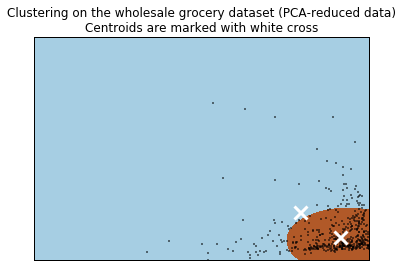

In [63]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [89]:
#Bring the centroids into the original dimensions
centroids2 = PCA(n_components = 2).fit(data).inverse_transform(centroids)
print pd.DataFrame(centroids2.round(),columns=list(data.columns))

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  21466  12191    16154    4534              6407          2824
1   9103   3839     5441    2624              1803          1127


After bring back the centroids in the original Dimensions we can cleary see, we have one centroid for the large volume customers and one for the small or medium size businesses.

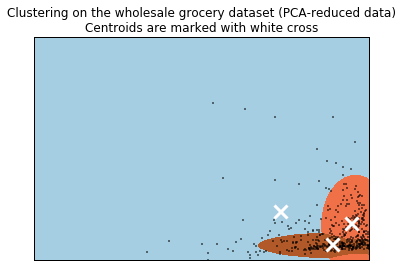

In [39]:
#try  clustering with 4 components
reduced_data = PCA(n_components=2).fit(data).transform(data)
#clusters = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters = GMM(n_components = 3)
clusters.fit(reduced_data)
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = clusters.means_
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

I found 2 cluster to best seperated the custerm, with 3 clustern there seams to be no realboundry.

So for the 2 clusters:
We have one cluster in the buttom right which contans close group of customer, we can discribe them as small volume customers.
The other bigger cluster with the higher variance, we can discribe as large volume customers.

**8)** Which of these techniques did you feel gave you the most insight into the data

Answer: 

I feel PCA give me a good insight into the data. With the help of PCA I could decrease the dimensions from 6 to 2. Which helps in visualisation and understanding the data. 
With the 2 features from PCA I could make good use of GMM to identifier 2 main groups of customer. With this crucial information the distributor can now better reorganize his business to fulfill the needs for this segments.
The result from GMM exceeded the ones from K-means in terms of founding good boundarys for oure two types of customers. 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

With that technique the company can now better analyse there type of customers. The can now define market segments for the customer. 
The can perform A/B for each segment indepently that will be importe because the different customer have different needs. For example the large volume customer might habe better cooling equiments for perishable products so one delivery in the evening might not be a problem for them. But the small customers might depend on fresh deliverys in the morning.
So when the company uses A/B testing it can operse the impact for each segment independently.

**10)** How would you use that data to help you predict future customer needs?

Answer:

We could now based on oure customer segmentation build a supervised lerning model to predict if a new customer will be a big or small company. With this information we can right from the begining offer them the right mixture of goods. 
We could also learn about the special demand for oure segments to improve oure buisness model.